# VR Z' issues

So, I was having some issues with the VR track jets for the Z' sample, when I was trying to take the logarithm and scale, it looked like there were tracks that had a $\Delta R$ of 0, which gave a log of $- \infty$. I thought this was probably due to cases where a single (probably combinatorial) track is basically defining the jet axis, but I want to verify this here so that I'll know *how* to deal with these events.  



In [1]:
import numpy as np
import h5py
import sys
import pandas as pd
import xarray as xr

sys.path.append("../..")
from usefulFcts import *
from trainNet import *
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# Z'
mc = 'mc16d'
jetCollection = 'VR'
physicsSample = "Zprime_1.5TeV"
subDir = '{}_{}_{}'.format(mc, jetCollection, physicsSample)

vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTagTrain = "3mtrain_25trks_{}_sd0_rev".format(vStr)
dataDir = '../../data/'

f_name = "{}/data_{}.hdf5".format(dataDir+subDir,dataTagTrain)

f = h5py.File(f_name,"r")
X_VR_Zprime = f['X_train'][:]
y_VR_Zprime = f['y_train'][:]
ix_VR_Zprime = f['ix_train'][:]
f.close()

df_tag = '3mtrain_25trks_sd0_rev'
jet_df = pd.read_hdf('{}/{}/jet_{}.h5'.format(dataDir,subDir,df_tag), key='jet_df')
trk_xr = xr.open_dataarray('{}/{}/trk_{}.nc'.format(dataDir,subDir,df_tag))

In [3]:
X_VR_Zprime

array([[[ 0.47636953, -0.6108889 ,  1.        , ...,  0.65415615,
         -0.06896526,  1.3723655 ],
        [ 0.36775386,  0.62012446,  1.        , ...,  1.2818365 ,
          1.1424783 ,  0.6596285 ],
        [ 0.20157568,  0.91719925,  1.        , ...,  0.6384342 ,
         -0.06896526, -0.05310848],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[12.431108  ,  3.8826163 ,  1.        , ...,  0.33705205,
         -0.06896526, -0.05310848],
        [ 9.109442  ,  0.22945915,  1.        , ...,  0.22030322,
         -2.4918525 , -0.7658455 ],
        [ 2.2827356 ,  3.808666  ,  1.        , ...,  1.1429421 ,
         -0.06896526,  0.6596285 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [5]:
df_tag = '4mtrain_15trks_sd0_rev'
jet_df = pd.read_hdf('{}/mc16d_VR_hybrid_1.5TeV/jet_{}.h5'.format(dataDir,df_tag), key='jet_df')

In [6]:
np.min(jet_df.pt_orig)

10.000001953125

In [20]:
# f_name = "{}/mc16d_VR_hybrid_1.5TeV/data_{}.hdf5".format(dataDir,dataTagTrain)

# f = h5py.File(f_name,"r")
# X_VR_hyb = f['X_train'][:]
# f.close()

In [7]:
np.where(X_VR_Zprime,)

(array([      0,       0,       0, ..., 2527479, 2527479, 2527479]),
 array([0, 0, 0, ..., 4, 4, 4]),
 array([ 0,  1,  2, ..., 10, 11, 12]))

In [8]:
jet_df.head()

LabDr_HadF      pt_orig  eta_orig  phi_orig          m  ip3d_llr  \
0         4.0   592.080563 -0.550039  0.699945  48.591086 -1.735607   
1         4.0   495.896813 -0.894971 -2.301043  48.305797 -2.234141   
2         0.0  1255.306500  1.105524 -1.610375  79.408078  6.054402   
3         0.0  1175.757500  0.552574  1.549171  61.284566 -4.313666   
4         5.0   356.019125 -0.723369 -0.459267  22.676287 -0.190591   

        ip3d_pb       ip3d_pc       ip3d_pu  aliveAfterOR  aliveAfterORmu  \
0  3.042891e-10  1.365689e-08  1.726041e-09           1.0             1.0   
1  2.734411e-05  3.140777e-04  2.553519e-04           1.0             1.0   
2  1.971835e-08  8.001834e-09  4.628892e-11           1.0             1.0   
3  4.617770e-12  8.446367e-10  3.450115e-10           1.0             1.0   
4  2.154559e-05  1.449093e-04  2.606939e-05           1.0             1.0   

        JVT           pt       eta       phi  nConst  
0  0.991944   564.773500 -0.550311  0.699945    40.0  
1  1.000000   489.887031 -0.895341 -2.301043    27.0  
2  0.993177  1266.775750  1.105800 -1.610375    40.0  
3  0.995751  1194.275250  0.552936  1.549171    39.0  
4  1.000000   380.551469 -0.723565 -0.459267    21.0

In [4]:
trk_xr.coords['var']

<xarray.DataArray 'var' (var: 25)>
array(['sd0', 'sz0', 'ip3d_d0', 'ip3d_z0', 'ip3d_grade', 'pt', 'eta', 'theta',
       'phi', 'orig', 'nInnHits', 'nsharedBLHits', 'nsplitBLHits',
       'nNextToInnHits', 'nPixHits', 'nPixHoles', 'nsharedPixHits',
       'nsplitPixHits', 'nSCTHits', 'nSCTHoles', 'nsharedSCTHits', 'ptfrac',
       'dr', 'prbP', 'pPerp'], dtype=object)
Coordinates:
  * var      (var) object 'sd0' 'sz0' 'ip3d_d0' ... 'dr' 'prbP' 'pPerp'

In [9]:
# Get the mask
mask = ~ np.all(trk_xr.values == 0, axis=-1)

In [16]:
inpts = vStr

In [17]:
inpts[:2]

'sd'

In [10]:
inpts = vStr.split('_')
inpts.remove('logNorm')
inpts.remove('norm')

noNormVars = inpts[:-4]
logNormVars = inpts[-4:-2]
jointNormVars = inpts[-2:]

In [9]:
inpts[4]

'nsharedBLHits'

In [11]:
miniX = trk_xr.loc[:,:,logNormVars].values

In [12]:
for i, v in enumerate(logNormVars):
        #j = i + len(noNormVars)
        miniX[:,:,i][mask] = np.log(miniX[:,:,i][mask])


In [13]:
badTrks = (miniX[:,:,0][mask] == 0)
trk_xr.loc[:,:,'dr'].values[mask][badTrks]

array([], dtype=float32)

In [14]:
badTrks = (miniX[:,:,1][mask] == 0)
trk_xr.loc[:,:,'pt'].values[mask][badTrks]

array([], dtype=float32)

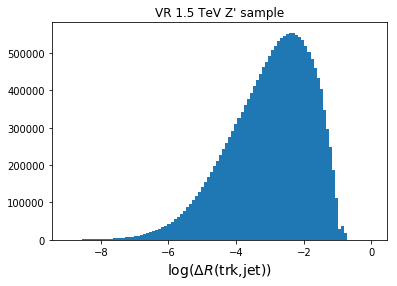

In [27]:
plt.hist(miniX[:,:,1][mask],100,range=(-9,0))
plt.xlabel('$\log ( \Delta R$(trk,jet)$)$',fontsize=14)
plt.title('VR 1.5 TeV Z\' sample')
plt.savefig('../../figures/mc16d_VR_Zprime_1.5TeV/log_dr.pdf')
plt.show()

In [41]:
trk_xr.loc[:,:,'ptfrac'].values[mask][badTrks]

array([0.99994934, 0.9999562 , 0.9999981 ], dtype=float32)

Yes, exactly as I was suspecting, these are due to jets where all of the energy is dominated by just one track.

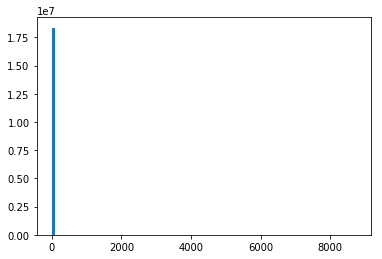

In [31]:
plt.hist(trk_xr.loc[:,:,'ptfrac'].values[mask],bins=100)
plt.show()

In [32]:
np.min(trk_xr.loc[:,:,'ptfrac'].values[mask]), np.max(trk_xr.loc[:,:,'ptfrac'].values[mask])

(3.033463e-08, 8740.628)

In [33]:
np.sum(trk_xr.loc[:,:,'ptfrac'].values[mask] > 1)

46961

In [28]:
ptfrac = trk_xr.loc[:,:,'ptfrac'].values[mask]
ptfrac[ptfrac > 1]

array([2.3112533, 1.7119648, 1.6622771, ..., 2.0873456, 1.5475442,
       6.6281157], dtype=float32)

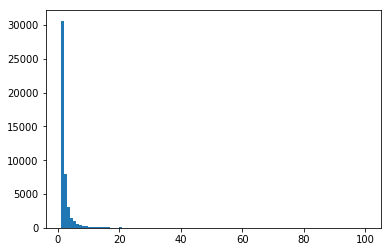

In [39]:
plt.hist(ptfrac[ptfrac > 1],100,(1,100))
plt.show()

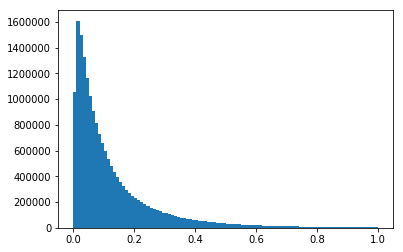

In [40]:
plt.hist(ptfrac,100,(0,1))
plt.show()